In [61]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import seaborn as sns

In [38]:
data = pd.read_csv("data/train_housing.csv")

In [39]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Modelamiento

In [89]:
FEATURES = ["LotFrontage", "LotArea", "YearBuilt", "1stFlrSF", "MoSold"]
TARGET = ["SalePrice"]
modelling_data = data[FEATURES + TARGET].dropna()
X = modelling_data[FEATURES]
X["constant"] = 1
y = modelling_data["SalePrice"]

In [90]:
X.head()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,MoSold,constant
0,65.0,8450,2003,856,2,1
1,80.0,9600,1976,1262,5,1
2,68.0,11250,2001,920,9,1
3,60.0,9550,1915,961,2,1
4,84.0,14260,2000,1145,12,1


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size = 0.2)


In [92]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,MoSold,constant
179,60.0,8520,1923,968,7,1
1130,65.0,7804,1928,1328,12,1
1330,85.0,10000,2006,1588,12,1
1331,55.0,10780,1976,954,7,1
333,59.0,8198,2004,1358,7,1


In [93]:

model = sm.OLS(y_train, X_train)

In [94]:
result = model.fit()

In [95]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sat, 07 Feb 2026   Prob (F-statistic):          6.45e-165
Time:                        17:27:29   Log-Likelihood:                -11866.
No. Observations:                 960   AIC:                         2.374e+04
Df Residuals:                     954   BIC:                         2.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
LotFrontage   375.3962     89.534      4.193      0.000     199.690     551.102
LotArea         1.0523      0.244      4.321      0.000       0.574       1.530
YearBuilt     980.8907     61.389     15.978      0.000     860.418    1101.364
1stFlrSF      102.3070      5.708     17.924      0.000      91.106     113.508
MoSold         51.8540    674.410      0.077      0.939   -1271.643    1375.352
constant    -1.906e+06   1.19e+05    -15.964      0.000   -2.14e+06   -1.67e+06
==============================================================================
Omnibus:                      345.595   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2516.060
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                      10.378   Cond. No.                     8.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
lr = LinearRegression() # aca se resuelve con el algortimo
# de gradiente descendiente

In [97]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
predictions_vector = lr.predict(X_test)

In [99]:
predictions_vector

array([253487.57346108, 170419.81821093, 138748.39985397, 212629.18202388,
       182066.35635843, 187172.82570117, 135530.93680247, 167485.80501271,
        78898.35871662, 235182.39653312, 195997.42697126, 180086.93271005,
       161513.33119092, 221135.22202937, 227174.33639531, 137407.85736012,
       115730.03939632, 187412.37068442, 102609.38139419, 157607.55092074,
       180183.18290456, 196517.62485221, 246218.75431232, 139884.85272985,
       166425.73540119, 265512.24340094, 130286.57708388,  97551.32033627,
       188424.8850571 , 218217.42875984, 247674.42465099,  99011.05700161,
       151418.41137146, 233001.47243604, 310543.45382993, 212527.38095326,
       241791.72027996, 137282.37245227, 282288.13766262, 196586.83259097,
        90252.44318767, 242514.58200189, 152993.40260201, 290850.0851215 ,
       240046.80356375, 250814.57242128, 214541.889919  , 141258.09313304,
       272142.81589679,  85217.98751812, 271805.40623925, 268524.80757281,
        53703.85644203, 2

In [100]:
predictions = pd.DataFrame({
    "predictions": predictions_vector,
    "real": y_test
})

<Axes: xlabel='predictions', ylabel='real'>

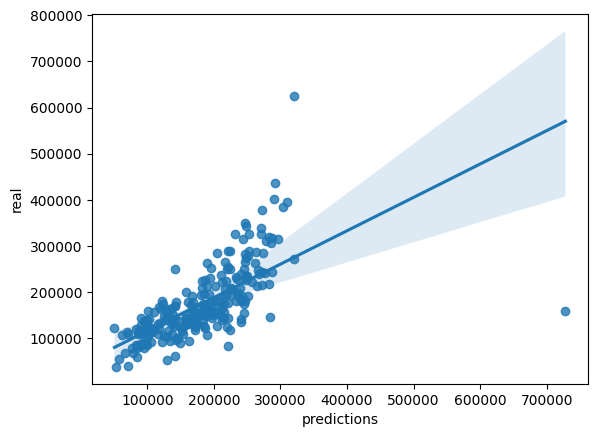

In [101]:
sns.regplot(x="predictions", y="real", data= predictions)

<Axes: xlabel='predictions', ylabel='real'>

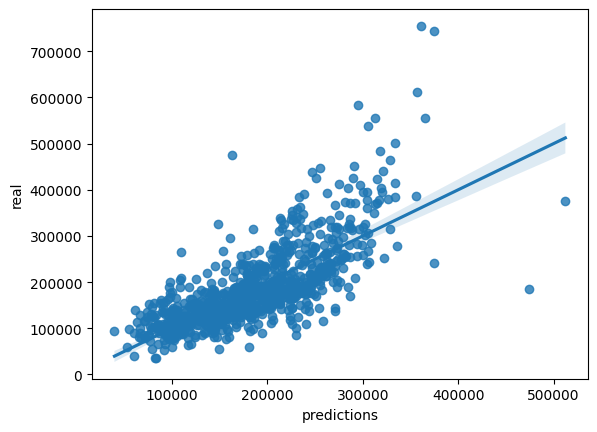

In [102]:
train = predictions = pd.DataFrame({
    "predictions": lr.predict(X_train),
    "real": y_train
})
sns.regplot(x = "predictions", y="real", data = train)

In [103]:
r2_score(y_train, lr.predict(X_train))

0.5549388300909499

In [104]:
mean_squared_error(y_train, lr.predict(X_train))**0.5
# es el error promedio, en promedio nuestras predicciones se desvian
# en 77374 dolares

56469.140828362324